<a href="https://colab.research.google.com/github/Kalaikujji/kalai/blob/main/walmart%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import pandas as pd


In [2]:
df=pd.read_csv('/content/Walmart_Store_sales.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


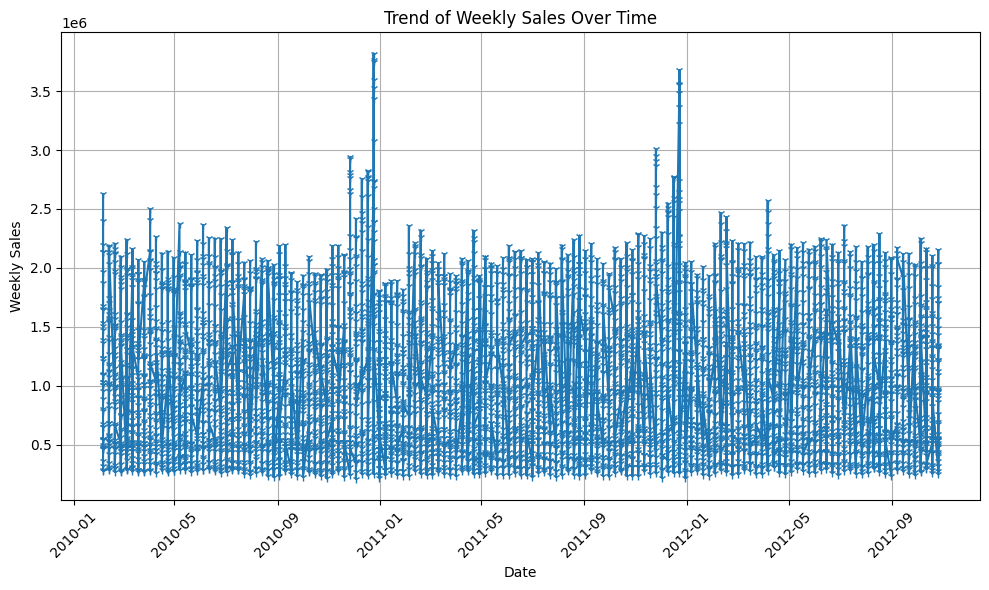

In [8]:
import matplotlib.pyplot as plt

# Convert Date column to datetime format with the correct format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Sort DataFrame by Date
df.sort_values(by='Date', inplace=True)


# Plotting trend of Weekly Sales over time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Weekly_Sales'], marker='1', linestyle='-')
plt.title('Trend of Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

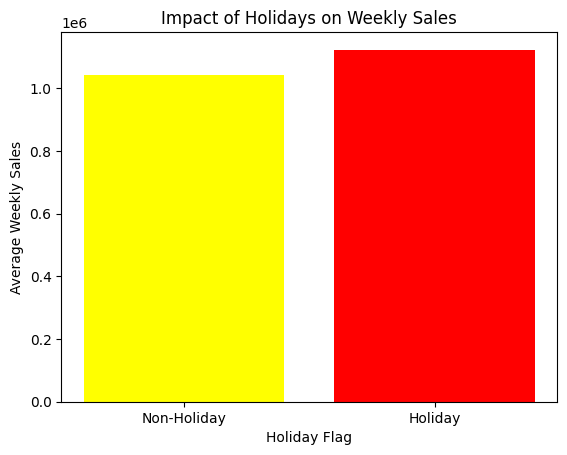

In [13]:
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()


plt.bar(['Non-Holiday', 'Holiday'], holiday_sales, color=['yellow', 'red'])
plt.title('Impact of Holidays on Weekly Sales')
plt.xlabel('Holiday Flag')
plt.ylabel('Average Weekly Sales')
plt.show()

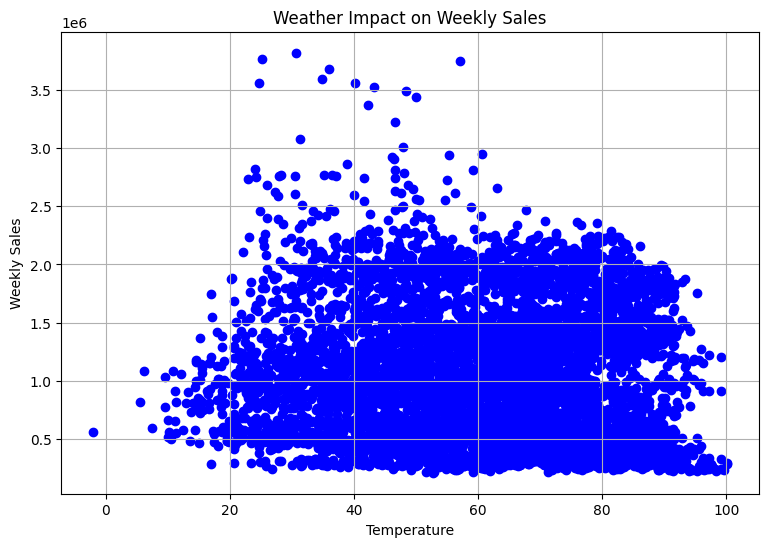

In [15]:
plt.figure(figsize=(9, 6))
plt.scatter(df['Temperature'], df['Weekly_Sales'], color='blue')
plt.title('Weather Impact on Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

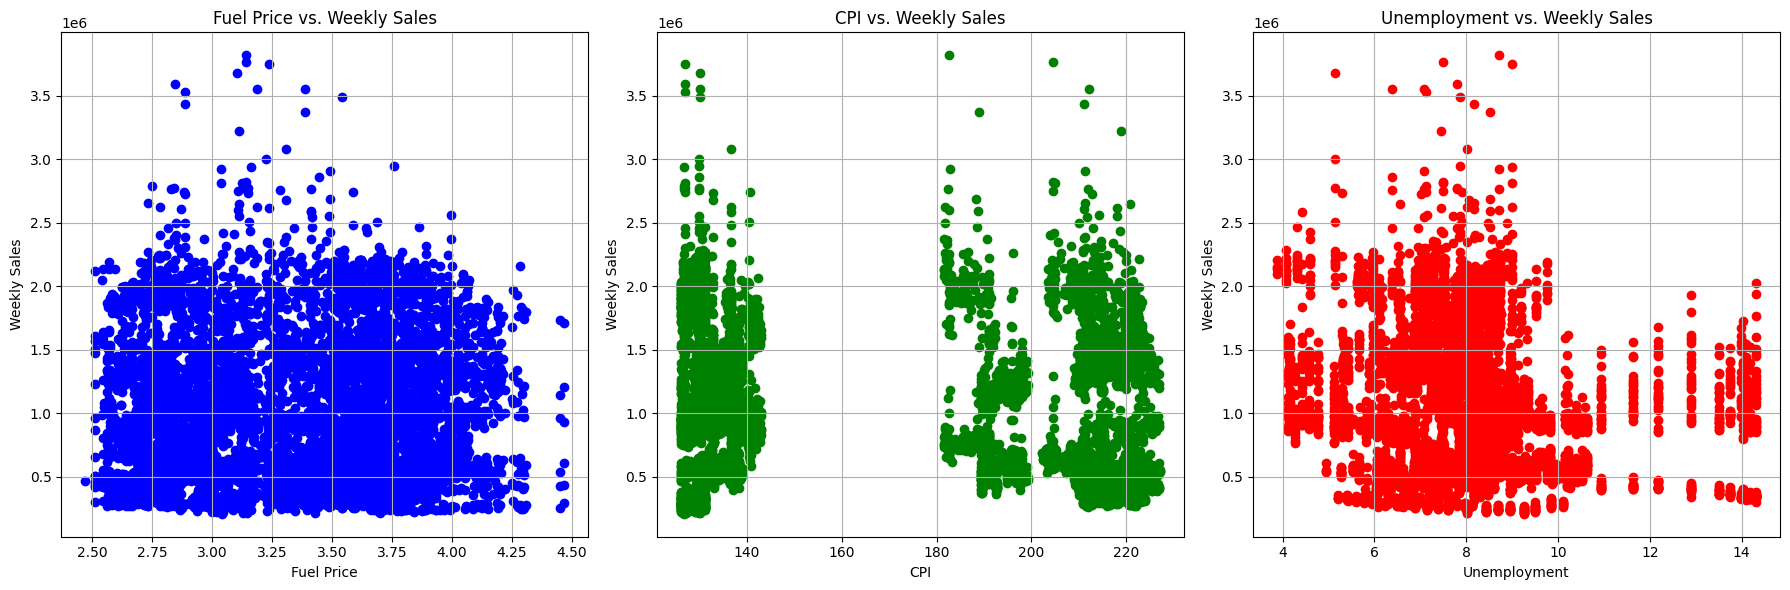

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot for Fuel Price vs. Weekly Sales
axes[0].scatter(df['Fuel_Price'], df['Weekly_Sales'], color='blue')
axes[0].set_title('Fuel Price vs. Weekly Sales')
axes[0].set_xlabel('Fuel Price')
axes[0].set_ylabel('Weekly Sales')
axes[0].grid(True)

# Scatter plot for CPI vs. Weekly Sales
axes[1].scatter(df['CPI'], df['Weekly_Sales'], color='green')
axes[1].set_title('CPI vs. Weekly Sales')
axes[1].set_xlabel('CPI')
axes[1].set_ylabel('Weekly Sales')
axes[1].grid(True)

# Scatter plot for Unemployment vs. Weekly Sales
axes[2].scatter(df['Unemployment'], df['Weekly_Sales'], color='red')
axes[2].set_title('Unemployment vs. Weekly Sales')
axes[2].set_xlabel('Unemployment')
axes[2].set_ylabel('Weekly Sales')
axes[2].grid(True)

plt.tight_layout()
plt.show()

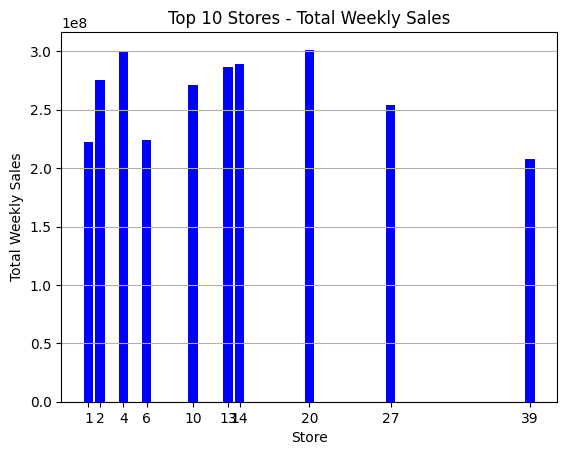

In [18]:
# Group by Store and calculate total Weekly Sales for each store
store_sales = df.groupby('Store')['Weekly_Sales'].sum()

# Select top 5 stores based on total sales
top_10_stores = store_sales.nlargest(10)

# Plotting Store Comparison for top 5 stores
plt.bar(top_10_stores.index, top_10_stores.values, color='blue')
plt.title('Top 10 Stores - Total Weekly Sales')
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')
plt.xticks(top_10_stores.index)
plt.grid(axis='y')
plt.show()


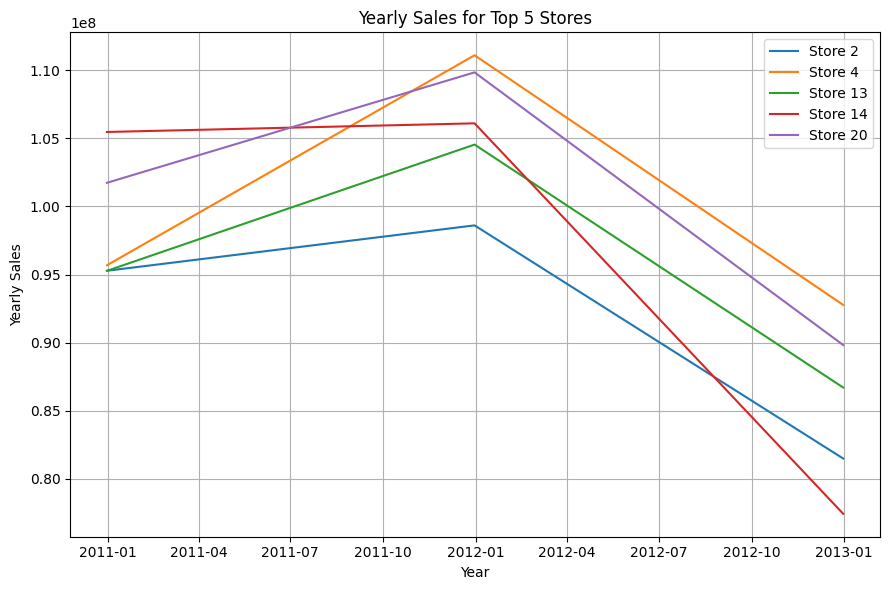

In [20]:
# Group by Store and Date, then sum the Weekly Sales for each Store and Date
df_agg = df.groupby(['Store', pd.Grouper(key='Date', freq='Y')])['Weekly_Sales'].sum().reset_index()

# Sort by Total Yearly Sales and select top 5 stores
top_5_stores = df_agg.groupby('Store')['Weekly_Sales'].sum().nlargest(5).index

# Filter the dataframe to include only data for top 5 stores
df_top_5 = df_agg[df_agg['Store'].isin(top_5_stores)]

# Plotting the Yearly Sales for top 5 stores
plt.figure(figsize=(9, 6))
for store, data in df_top_5.groupby('Store'):
    plt.plot(data['Date'], data['Weekly_Sales'], label=f'Store {store}')

plt.title('Yearly Sales for Top 5 Stores')
plt.xlabel('Year')
plt.ylabel('Yearly Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-21-ed7228a9e67c>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


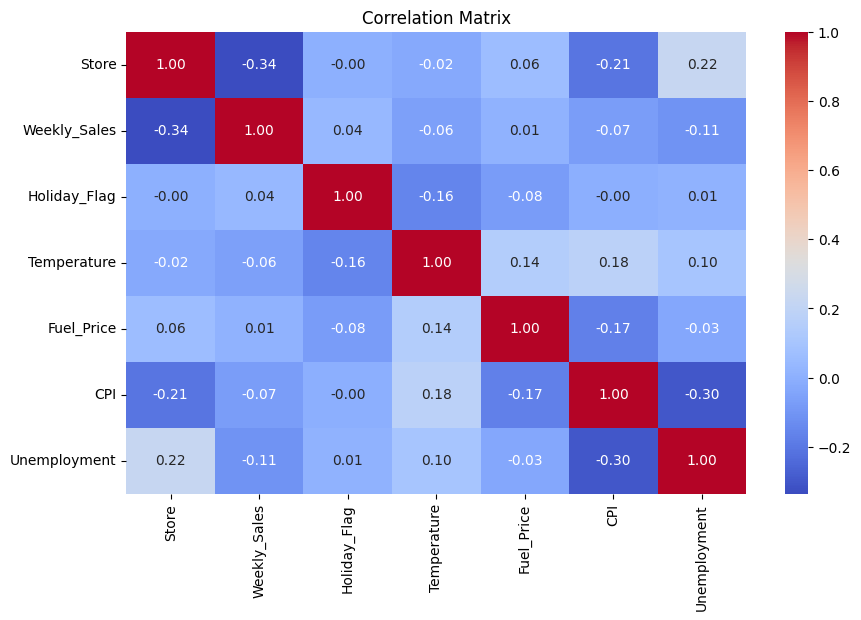

In [21]:
import seaborn as sns

# Compute correlation matrix
correlation_matrix = df.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()